a.

(900, 604, 3)


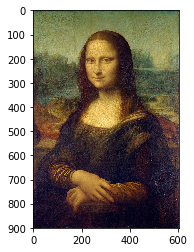

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("Mona_Lisa.jpg")
print(image.shape)
lenX, lenY, _ = image.shape
plt.imshow(image)
plt.show()

b.

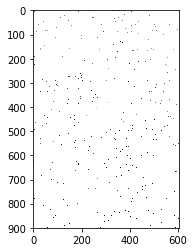

In [180]:
import random
allCoordinates=[[x,y] for x in range(lenX) for y in range(lenY)]
sampleSize=5000
trainCoordinates = random.sample(allCoordinates, sampleSize)
sampledImage = np.array([[[255,255,255] for _ in range(lenY)] for _ in range(lenX)]).astype('uint8')
trainPixels = np.zeros((sampleSize,3))
for i in range(sampleSize):
    trainPixels[i] = image[trainCoordinates[i][0]][trainCoordinates[i][1]]
    sampledImage[trainCoordinates[i][0]][trainCoordinates[i][1]] = image[trainCoordinates[i][0]][trainCoordinates[i][1]]

plt.imshow(sampledImage)
plt.show()

c. This is step is not necessary.

d. 

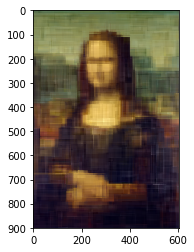

In [179]:
from sklearn.ensemble import RandomForestRegressor

def getImgRandomForest(numberOfTrees, depth):
    estimator = RandomForestRegressor(random_state=0, n_estimators=numberOfTrees, max_depth=depth)
    estimator.fit(trainCoordinates,trainPixels)
    predictedImg = estimator.predict(allCoordinates).reshape(lenX,lenY,3).astype('uint8')
    plt.imshow(predictedImg)
    plt.show()
getImgRandomForest(30,100)

e. (i) As we increase the number of decision stumps in the tree, we get more and more meaningful and precise color blocks compare to the origin Mona Lisa. We are using 1 decision tree in this forest, thus the boundary of these blocks is very clear in different depths.  
The reason is that, the larger the depth the more the blocks. To an extream extend, we are able to catch every pixel's color, thus we will get an identical image as the origin one.

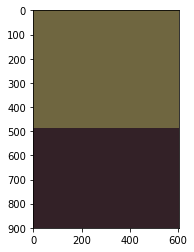

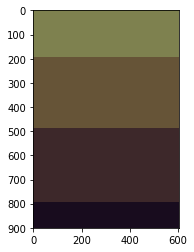

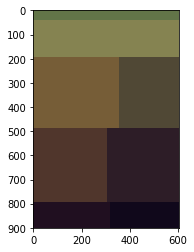

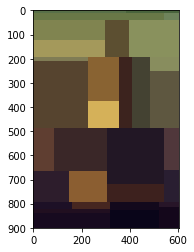

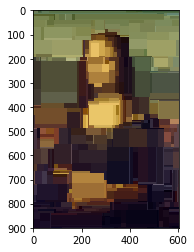

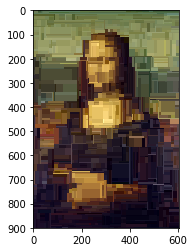

In [174]:
numberOfTrees=1
for depth in [1, 2, 3, 5, 10, 15]:
    getImgRandomForest(numberOfTrees, depth)

(ii) As we keep the depth of 7 in this forest, roughly every block remain the same accuracy in terms of position and cololr. As we increase the number of trees in the forest, we get more subtle details of the gradual color change around the boundary.   
The reason is that, different trees may have different partition for this image. Each tree catches different patches of the image. Thus when average them up, we are able to get more accurate color around the boundary.

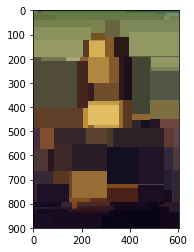

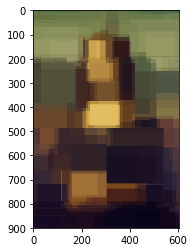

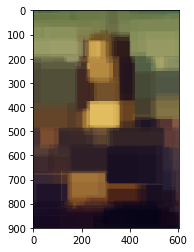

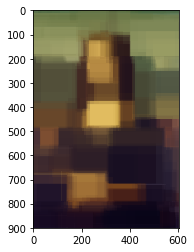

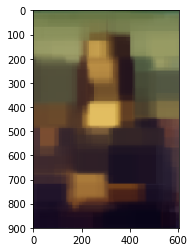

In [175]:
depth=7
for numberOfTrees in [1, 3, 5, 10, 100]:
    getImgRandomForest(numberOfTrees, depth)

(iii) 1-NN in this example basicly bahaves similar to enlarge every pixel in the training set till they fill up the image size. Thus the image will look like drawed by "dots" of colors. 

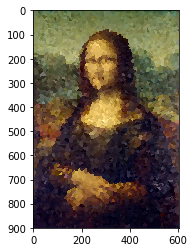

In [176]:
from sklearn.neighbors import KNeighborsClassifier
estimator = KNeighborsClassifier(n_neighbors=1)
estimator.fit(trainCoordinates,trainPixels)
predictedImg = estimator.predict(allCoordinates).reshape(lenX,lenY,3).astype('uint8')
plt.imshow(predictedImg)
plt.show()

(iv) Pruning is to solve overfitting problem. In random forest, we don't have this problem, thus we don't need pruning.

f.

(i) R<sub>1</sub>(j,s) = {X|X<sub>j</sub><=s} and R<sub>2</sub>(j,s) = {X|X<sub>j</sub>>s}


(ii) The result image consists of many rectangle patches of color with different size.

(iii) If the depth of the single tree is d. Then the maximum of the number of patches is 2^d.

(iv) If the maximun of the depth of each decision tree is d. If every tree is somehow identical, the maximum number of patches is 2^d. If every tree is different, then the maximum number of patches is n*2^d.